In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor


house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [33]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression()

#Your code:
model.fit(X,y)

#Hint: .fit()

LinearRegression()

-32304.654721028113
[269.46205468]
0.49670880166311393


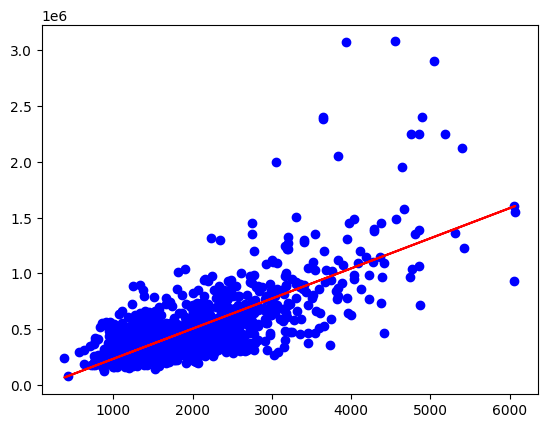

In [34]:
#b)

#Your code:
o=model.intercept_
print(o)
m=model.coef_
print(m)#this indicates positive correlation between the living area and prices. With every 1 sqft price increases by 269,46
score = model.score(X,y) #the evaluation score is 0,497 which suggests that this model is a moderate fit
#to the data. It shows that 50,3% of variation in prices is not explained by the living area in sqft suggesting that
#there are other factors that also contribute or that correlation is not linear.
print(score)
plt.scatter(X, y, color='blue')  #this plot shows how prices depend on living area in sqft
plt.plot(X, model.predict(X), color='red')  # regression line (predicted prices)

#Blue points represent actual data while the red line represents predicted prices calculated by
#linear regression model.

#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

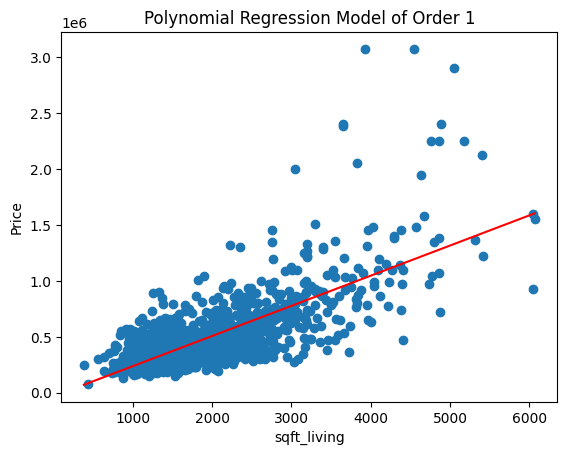

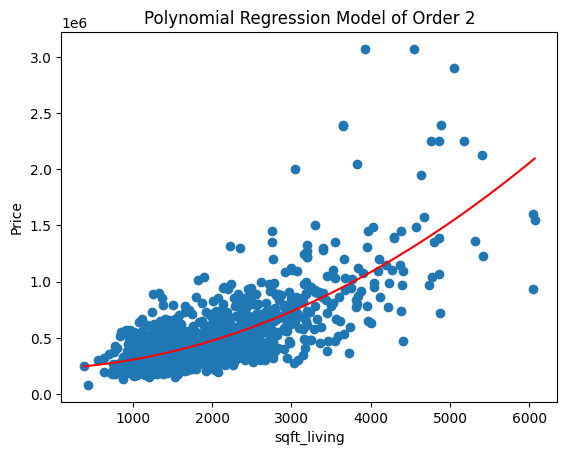

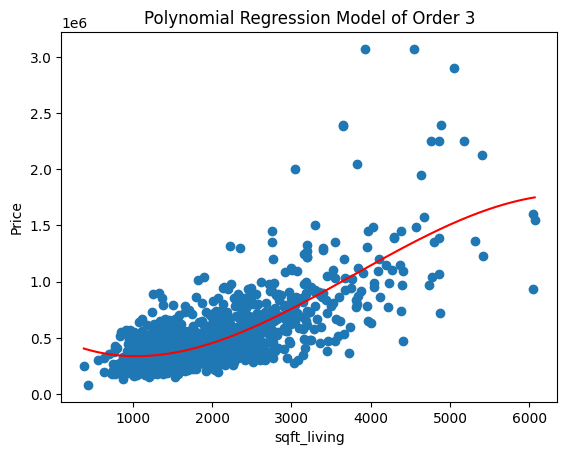

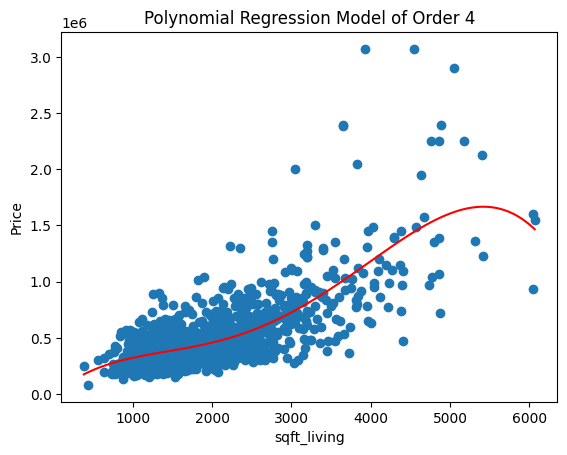

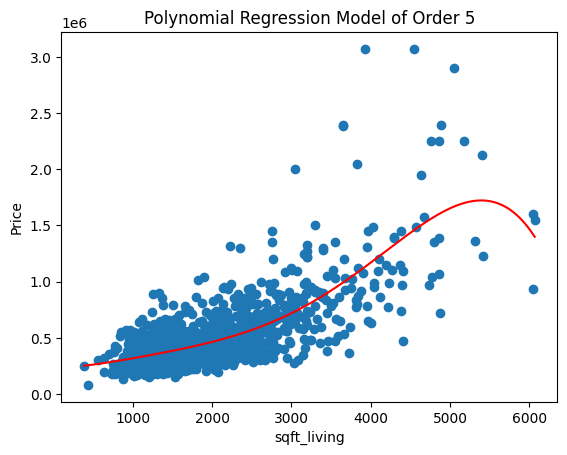

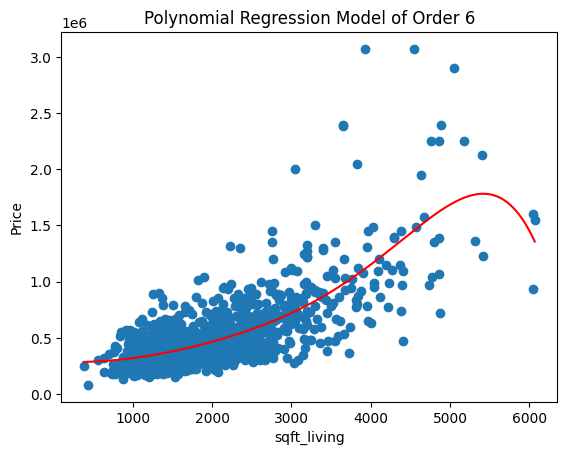

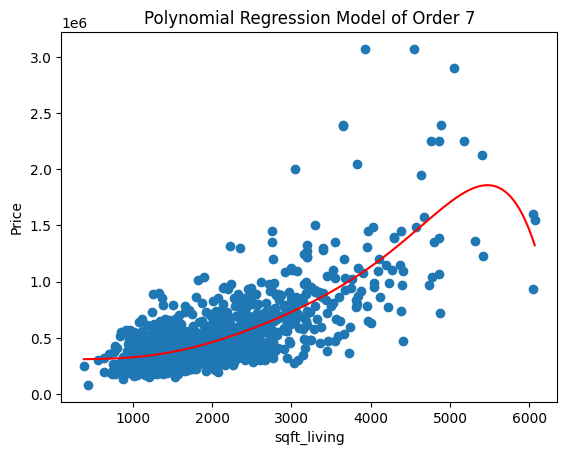

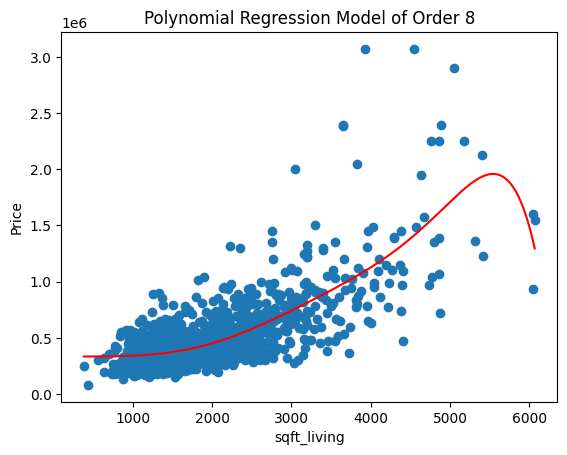

In [35]:
#c)
mse_list = []#we want to check mean squered error for every order to make model performance

for order in range(1,9):

    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
#Your code:
    model = LinearRegression()
    model.fit(X_order, y)

    # MSE
    y_pred = model.predict(X_order)
    mse = mean_squared_error(y, y_pred)
    mse_list.append(mse)

#this code is used to make curve smooth by deviding x into equal distances
    X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    X_range_order = poly.transform(X_range)
    y_pred_range = model.predict(X_range_order)

    plt.scatter(X, y)
    plt.plot(X_range, y_pred_range, color="red")
    plt.xlabel("sqft_living")
    plt.ylabel("Price")
    plt.title(f"Polynomial Regression Model of Order {order}")
    plt.show()

#this loop created for us 8 plots with Polynomial Regression Models for each order. It's goal is to illustrate how models,
#other then linear regression, are accurate.



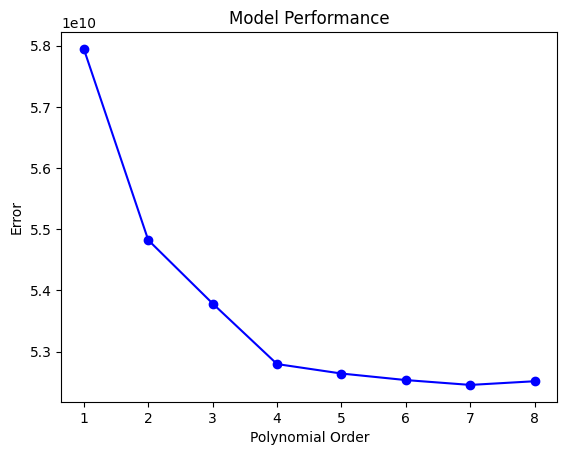

In [36]:
#Your code:
plt.plot(range(1, 9), mse_list, marker='o', color='blue')
plt.xlabel("Polynomial Order")
plt.ylabel("Error")# mean squared error
plt.title("Model Performance")
plt.show()
#This plot illustrates model performance by showing how mean squered error changes as the
#polynomial order increses.
#By analising it it is easy to come to the conclusion that 7th degree polynomial is the most accurate (the lowest error).
#But we have to be careful and take into consideration that high polynomials sometimes lead to overfitting.

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models.

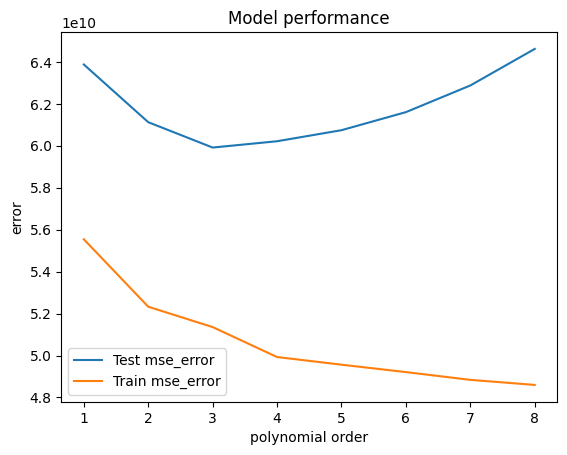

In [37]:
#a)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

train_errors = []
test_errors = []

for order in range(1,9):

    poly = PolynomialFeatures(order, include_bias = False)

    model_poly = LinearRegression()
    model_poly.fit(poly.fit_transform(X_train), y_train)

    test_error = mean_squared_error(y_test, model_poly.predict(poly.fit_transform(X_test)))
    train_error = mean_squared_error(y_train, model_poly.predict(poly.fit_transform(X_train)))
    test_errors.append(test_error)
    train_errors.append(train_error)


plt.plot(range(1, 9), test_errors, label="Test mse_error")
plt.plot(range(1, 9), train_errors, label="Train mse_error")
plt.xlabel("Polynomial Order")
plt.ylabel("Error")
plt.title("Model performance")
plt.legend()
plt.show()
#By dividing data into train and test set we are able to test our model. From the chart below we observe that test error is the lowest for 3rd polynomial
#order which suggests that 3rd degree provides the best balance between fitting and training data.

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

0.49670880166311404


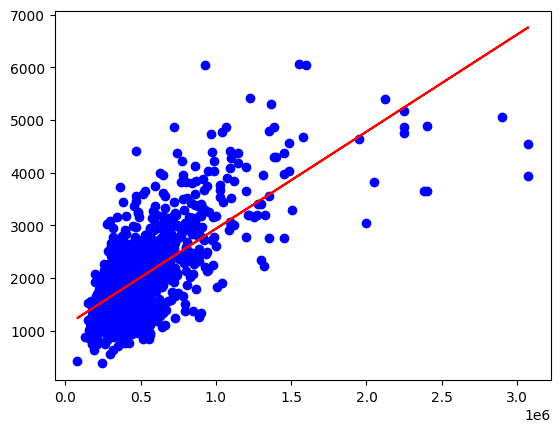

In [44]:
#a)
X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:
model = LinearRegression()
model.fit(X,y)
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
score = model.score(X,y)
print(score)

#this is a linear regression model that predicts sqft_living by prices


In [47]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

model = LinearRegression()
_= model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:
X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view', 'waterfront','bedrooms','bathrooms', ]].values.reshape(-1,7) #adding more features
y = house_df.price.values.reshape(-1)
poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print("Mean squared error for Ridge regression model: {0}".format(mean_squared_error(y_pred_ridge, y_test)))
#I applied more features and used ridge regression model to predict house prices. MSE is significantly smaller in ridge regrssion which suggests that using
#ridge regression and adding more features is more effective. :)

Mean squared error equals: 48749250331.21729
Mean squared error for Ridge regression model: 208264134537.56012


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.61005e-38): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
